In [1]:
# !git clone https://www.github.com/dmc27/ai2023.git

In [1]:
# import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ai2023.imutils import imshow
from sklearn.cluster import KMeans
from tqdm import tqdm

In [2]:
img_rgb = cv2.cvtColor(cv2.imread('ai2023/1600.png'), cv2.COLOR_BGR2RGB)
img_rgb_crop = cv2.cvtColor(cv2.imread('ai2023/1600.crop.png'), cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(cv2.imread('ai2023/1600.png'), cv2.COLOR_BGR2HSV)
img_hsv_crop = cv2.cvtColor(cv2.imread('ai2023/1600.crop.png'), cv2.COLOR_BGR2HSV)

img_lab = cv2.cvtColor(cv2.imread('ai2023/1600.png'), cv2.COLOR_BGR2LAB)
img_lab_crop = cv2.cvtColor(cv2.imread('ai2023/1600.crop.png'), cv2.COLOR_BGR2LAB)

In [3]:
# img_rgb = img_rgb / 255.

In [4]:
def maximum_likelihood(x, train_rgb, d, prob):
    mu = np.mean(train_rgb, axis = 0)
    covariance = np.cov(train_rgb, rowvar = False)
    temp = x - mu
    gx = -0.5 * np.dot(np.dot(temp, np.linalg.inv(covariance)), temp) - d/2 * np.log(2 * np.pi) - 1/2 * np.log(np.linalg.det(covariance)) + np.log(prob)
    return gx

In [5]:
def euclidean_dist(x, train_rgb):
    mu = np.mean(train_rgb, axis = (0, 1))
    temp = x - mu
    eucl = np.dot(temp, temp)
    return eucl ** 0.5

In [6]:
def mahalanobis_dist(x, train_rgb):
    mu = np.mean(train_rgb, axis = (0, 1))
    cov = np.cov(train_rgb, rowvar=False)
    temp = x - mu
    mahalanobis = np.dot(np.dot(temp, np.linalg.inv(cov)), temp)
    return mahalanobis ** 0.5

In [7]:
num_rows, num_cols = img_rgb.shape[0], img_rgb.shape[1]

In [11]:
img_rgb_out = img_rgb.copy()
rgb_euc_dist = []
for r in tqdm(range(0, num_rows)):
  for c in range(0, num_cols):
    euc_dist = euclidean_dist(img_rgb[r, c], img_rgb_crop)
    rgb_euc_dist.append(euc_dist)

    if euc_dist < 100.:
      img_rgb_out[r, c] = img_rgb[r, c]
    else:
      img_rgb_out[r, c]= np.array([0, 0, 0], dtype=np.uint8)

100%|██████████| 512/512 [00:23<00:00, 21.77it/s]


(array([  323.,  1212.,  2952., 11403.,  5936.,  4033.,  3339.,  2704.,
         2024.,  1818.,  1427.,  1379.,  1320.,  1279.,  1331.,  1242.,
         1500.,  1724.,  2767.,  5846., 26946., 38778., 25310., 16639.,
        10319.,  6797., 13098.,  1523.,  1441.,  1650.,  1615.,  1312.,
          839.,   464.,   383.,   316.,   310.,   345.,  1473.,  7073.,
         9194., 23758., 12573.,  3258.,   498.,   221.,   129.,    90.,
           53.,   180.]),
 array([  0.98033938,   7.55494543,  14.12955149,  20.70415754,
         27.2787636 ,  33.85336965,  40.42797571,  47.00258177,
         53.57718782,  60.15179388,  66.72639993,  73.30100599,
         79.87561204,  86.4502181 ,  93.02482415,  99.59943021,
        106.17403627, 112.74864232, 119.32324838, 125.89785443,
        132.47246049, 139.04706654, 145.6216726 , 152.19627865,
        158.77088471, 165.34549077, 171.92009682, 178.49470288,
        185.06930893, 191.64391499, 198.21852104, 204.7931271 ,
        211.36773315, 217.9423

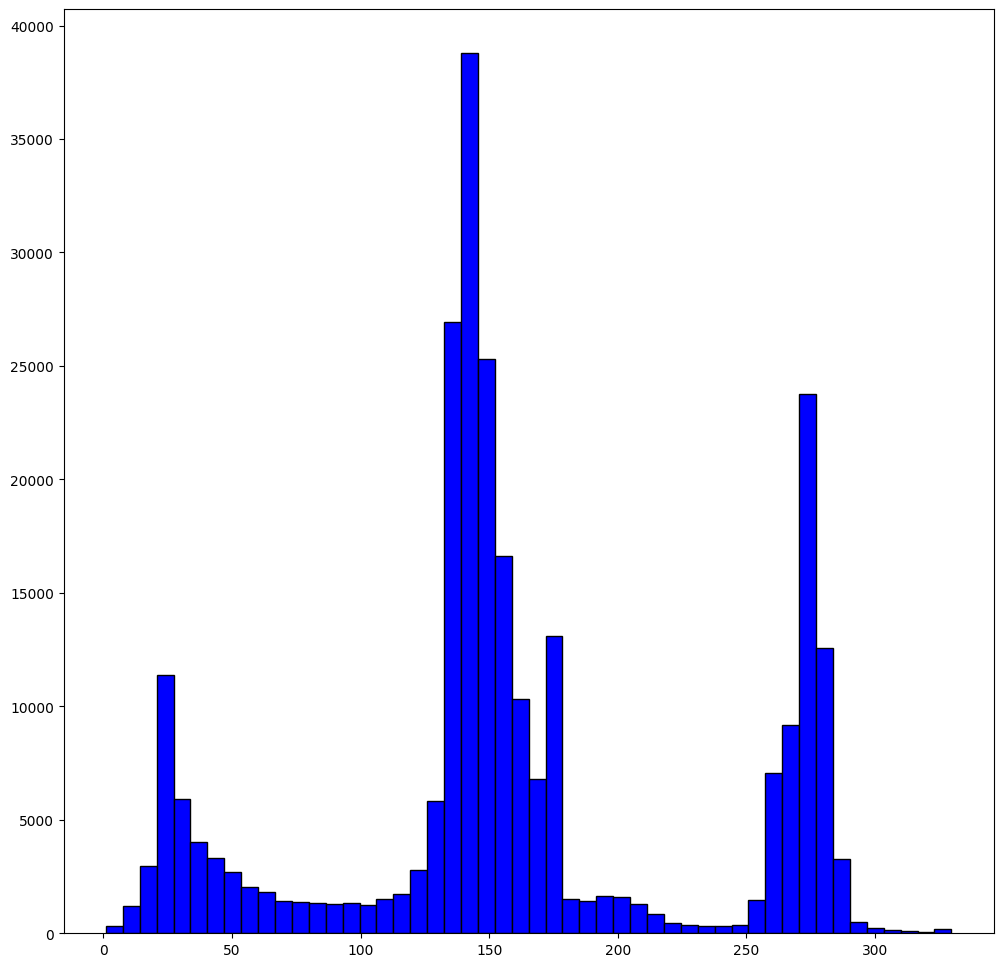

In [16]:
plt.figure(figsize = [12, 12])
plt.hist(rgb_euc_dist, bins= 50, edgecolor = 'black', color = 'b')

1. As we can see that from the histogram above, it is a multimodel distribution with 3 peaks, meaning that at least there are 3 classes in the image 1600.jpg

In [9]:
img_hsv_out = img_hsv.copy()
hsv_euc_dist = []
for r in tqdm(range(0, num_rows)):
  for c in range(0, num_cols):
    euc_dist = euclidean_dist(img_hsv[r, c], img_hsv_crop)
    hsv_euc_dist.append(euc_dist)

    if euc_dist < 85.:
      img_hsv_out[r, c] = img_hsv[r, c]
    else:
      img_hsv_out[r, c] = np.array([0, 0, 0], dtype=np.uint8)

100%|██████████| 512/512 [00:21<00:00, 23.97it/s]


In [10]:
img_lab_out = img_lab.copy()
for r in tqdm(range(0, num_rows)):
  for c in range(0, num_cols):
    euc_dist = euclidean_dist(img_lab[r, c], img_lab_crop)
    # euc_dist = np.sqrt((R - avg_R) ** 2 + (G - avg_G) ** 2 + (B - avg_B) ** 2)

    if euc_dist < 55.:
      img_lab_out[r, c] = img_lab[r, c]
    else:
      img_lab_out[r, c] = np.array([0., 128., 128.])

100%|██████████| 512/512 [00:18<00:00, 27.10it/s]


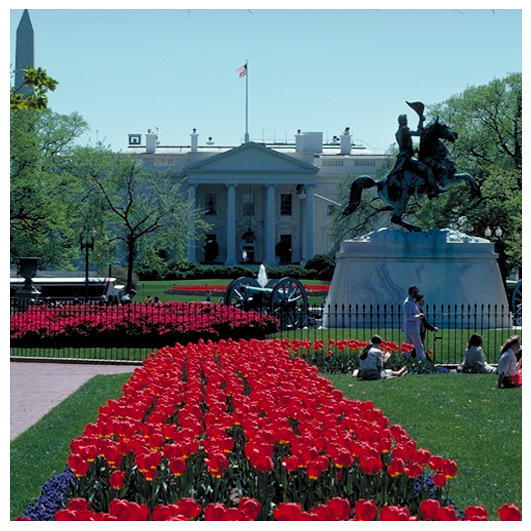

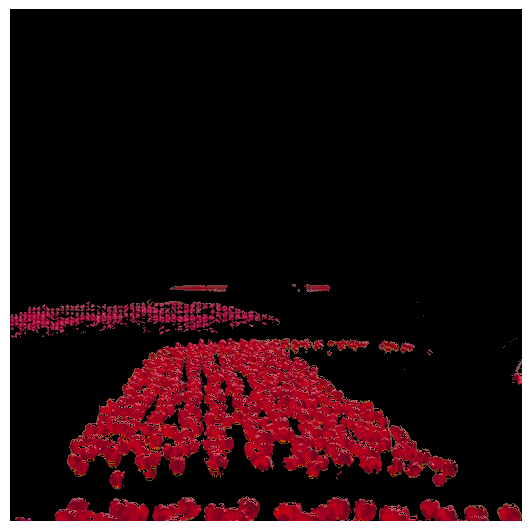

In [48]:
imshow(img_rgb)
imshow(cv2.cvtColor(img_lab_out, cv2.COLOR_LAB2RGB))

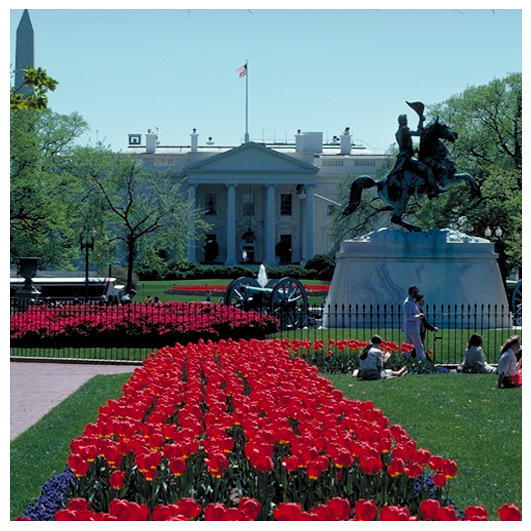

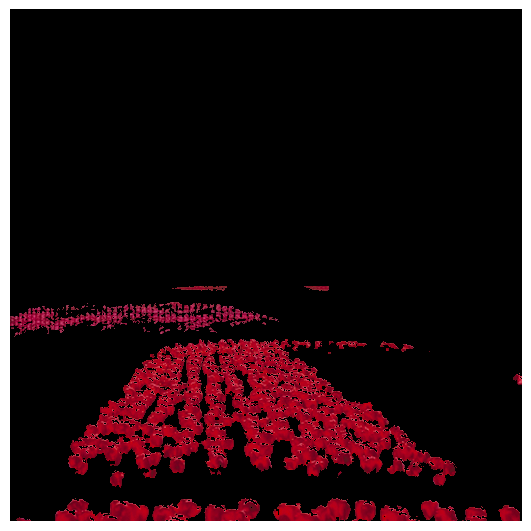

In [16]:
imshow(img_rgb)
imshow(cv2.cvtColor(img_hsv_out, cv2.COLOR_HSV2RGB))

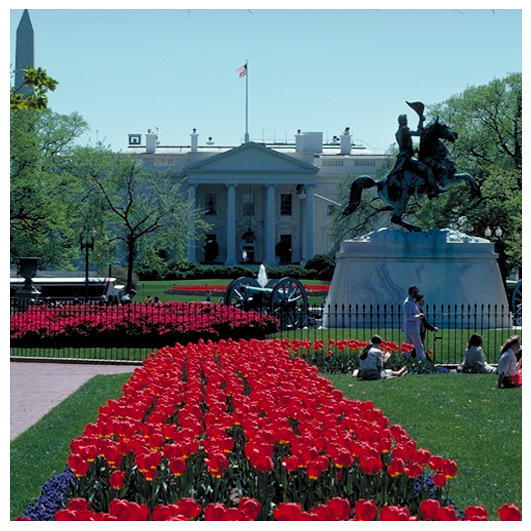

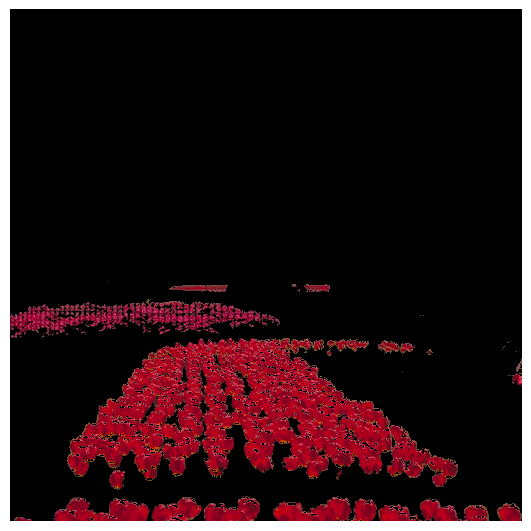

In [11]:
imshow(img_rgb)
imshow(img_rgb_out)

In [4]:
kmeans = KMeans(n_clusters = 3, n_init = 20)
kmeans.fit(img_rgb.reshape(-1, 3))

KMeans(n_clusters=3, n_init=20)

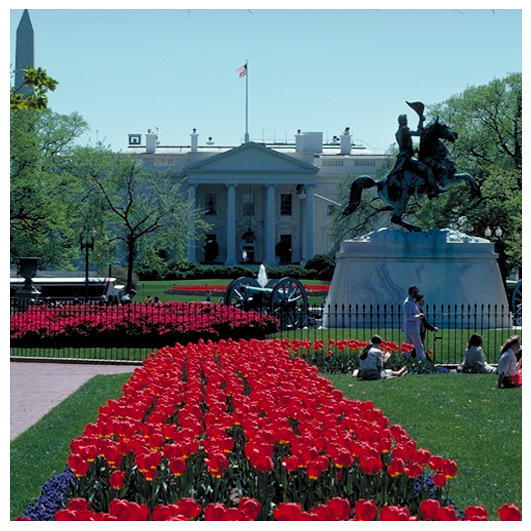

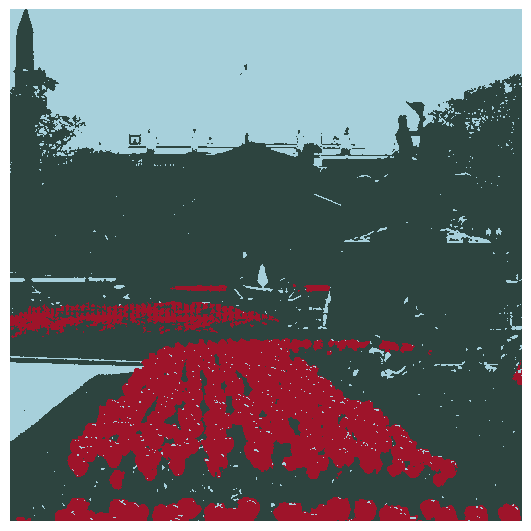

In [5]:
imshow(img_rgb)
seg_rgb_vals = kmeans.cluster_centers_[kmeans.labels_]

seg_img = seg_rgb_vals.reshape(img_rgb.shape)
imshow(seg_img.astype(np.uint8))